<h1>Informacje ogólne</h1>
<br/>
<div><b>Zbiór danych:</b> <a href="https://www.kaggle.com/sulianova/cardiovascular-disease-dataset">Cardiovascular Disease dataset</a></div>
<div><b>Pojemność zbioru:</b> 70 000 rekordów</div>
<div><b>Cel:</b> Analiza danych pacjentów pobranych podczas badań w celu predykcji, czy dany użytkownik posiada chorobę sercowo-naczyniową. W tym celu użyta zostanie uczenie maszynowe z nadzorem. Dane podzielone zostaną na dane treningowe oraz testowe w proporcjach kolejno 70% i 30%. Przebadane zostaną różne algorytmy i modele klasyfikacji.
</div>
<div><b>Opis danych:</b> Dostępne są trzy typy danych:
<ul>Obiektywne - rzeczowe dane</ul>
<ul>Badanie - wyniki badania medycznego</ul>
<ul>Subiektywne - dane podane przez pacjenta</ul>
</div> 
<div><b>Cechy danych: </b></div>
<table>
    <tr>
        <th>Id</th>
        <th>Nazwa</th>
        <th>Typ danych</th>
        <th>Nazwa kolumny</th>
        <th>Typ wartosci</th>
    </tr>
    <tr>
         <td>1</td>
         <td>Wiek</td>
         <td>Obiektywne </td>
         <td>age </td>
         <td>int(dni) </td>
    </tr>
    <tr>
         <td>2</td>
         <td>Wzrost</td>
         <td>Obiektywne </td>
         <td>height </td>
         <td>int(cm) </td>
    </tr>
    <tr>
         <td>3</td>
         <td>Waga</td>
         <td>Obiektywne </td>
         <td>weight </td>
         <td>float (kg) </td>
    </tr>
    <tr>
         <td>4</td>
         <td>Płeć</td>
         <td>Obiektywne </td>
         <td>gender </td>
         <td>kod, 1-kobieta, 2-mężczyzna</td>
    </tr>
    <tr>
         <td>5</td>
         <td>Ciśnienie skurczowe</td>
         <td>Badanie </td>
         <td>ap_hi </td>
         <td>int</td>
    </tr>
    <tr>
         <td>6</td>
         <td>Ciśnienie rozkurczowe</td>
         <td>Badanie </td>
         <td>ap_ho </td>
         <td>int</td>
    </tr>
    <tr>
         <td>7</td>
         <td>Cholesterol</td>
         <td>Badanie </td>
         <td>cholesterol</td>
         <td>1: normalny, 2: powyżej normalnego, 3: dużo powyżej normalnego </td>
    </tr>
    <tr>
         <td>8</td>
         <td>Glukoza</td>
         <td>Badanie </td>
         <td>gluc </td>
         <td>1: normalny, 2: powyżej normalnego, 3: dużo powyżej normalnego </td>
    </tr>
    <tr>
         <td>9</td>
         <td>Palacz</td>
         <td>Subiektywne </td>
         <td>smoke </td>
         <td>binary</td>
    </tr>
    <tr>
         <td>10</td>
         <td>Alkohol</td>
         <td>Subiektywne </td>
         <td>alco </td>
         <td>binary</td>
    </tr>
    <tr>
         <td>11</td>
         <td>Aktywność fizyczna</td>
         <td>Subiektywne </td>
         <td>active </td>
         <td>binary</td>
    </tr>
    <tr>
         <td>12</td>
         <td>Obecność chorób serca</td>
         <td>Badanie </td>
         <td>cardio </td>
         <td>binary</td>
    </tr>
    
    
</table>


<h1> Wczytanie i przygotowanie danych do obróbki</h1>

In [1]:
import pandas as pd

col_names = ["id", "age", "gender","height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]

# load dataset
data = pd.read_csv("cardio_dataset.csv", header=None, names=col_names, delimiter=";")

# drop rows with missing values
data.dropna(inplace=True)

data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<h1>Analiza danych </h1>

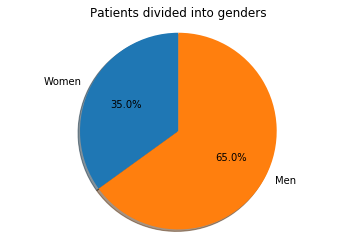

In [8]:
import matplotlib.pyplot as plt
import numpy as np

genders = pd.unique(data['gender'])

labels = ['Women', 'Men']

df = pd.DataFrame(data, columns=['gender', 'id', 'cardio']).groupby(by=['gender']).agg({'id':'count'}).reset_index()
df.rename(columns={'id': 'patientCount'}, inplace=True)


women_data  = df[df['gender'] == 1]['patientCount'].values[0]
men_data  = df[df['gender'] == 2]['patientCount'].values[0]

sizes = [men_data, women_data]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Patients divided into genders')
plt.show()

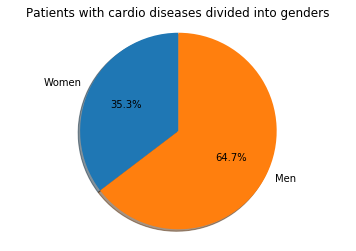

In [3]:
cardio_data = data[data['cardio'] == 1]
df = pd.DataFrame(cardio_data, columns=['gender', 'id']).groupby(by=['gender']).agg({'id':'count'}).reset_index()
df.rename(columns={'id': 'patientCount'}, inplace=True)


women_data  = df[df['gender'] == 1]['patientCount'].values[0]
men_data  = df[df['gender'] == 2]['patientCount'].values[0]

sizes = [men_data, women_data]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Patients with cardio diseases divided into genders')
plt.show()

In [4]:
print("Percent of people in the dataset with cardio disease: ", len(cardio_data)/len(data) * 100, "%")

Percent of people in the dataset with cardio disease:  49.97 %


<h1>Wybór cech</h1>

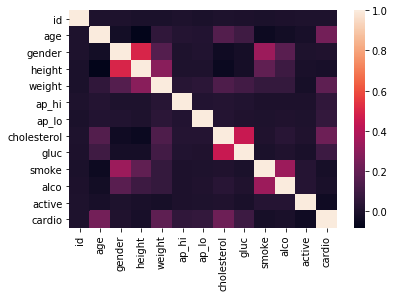

In [7]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

/home/magda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature age (0.290538)
2. feature ap_hi (0.180861)
3. feature weight (0.177246)
4. feature height (0.168145)
5. feature ap_lo (0.107762)
6. feature cholesterol (0.045249)
7. feature gluc (0.009877)
8. feature gender (0.007438)
9. feature active (0.005469)
10. feature alco (0.003894)
11. feature smoke (0.003522)


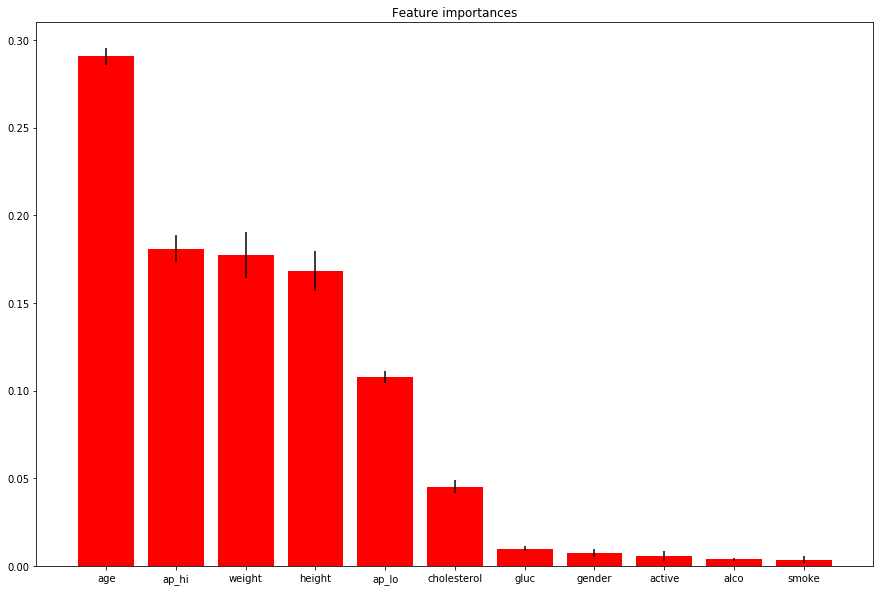

In [5]:

from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

feature_cols = ["age","gender","height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active"]
X = data[feature_cols] # Features
Y = data.cardio # Target variable

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X, Y)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices_names =  list(map(lambda x: feature_cols[x], indices))

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, indices_names[f], importances[indices[f]]))

# Plot the feature importances of the model
plt.figure(figsize=(15,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices_names)
plt.xlim([-1, X.shape[1]])
plt.show()
